# machine-learning-project

Use the "Run" button to execute the code.

Here's an outline of the project:
1. Download the Dataset
2. Explore & analyse the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Perform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with entire dataset
10. Document & publish the project online

# 1. Download the Dataset

Steps:
- Install important libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

## Install Important Libraries

In [1]:
!pip install opendatasets pandas numpy matplotlib==3.1.3 seaborn plotly scikit-learn xgboost --quiet

## Download Data from Kaggle

In [2]:
import opendatasets as od

In [3]:
dataset_url='https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data'

In [4]:
od.download(dataset_url)

Skipping, found downloaded files in "./store-sales-time-series-forecasting" (use force=True to force download)


In [5]:
data_dir='store-sales-time-series-forecasting'

## View Dataset Files
Let's look at the size, no. of lines and first few lines of each file.


In [6]:
!ls -lh {data_dir}

total 119M
-rw-r--r-- 1 root root  22K Dec  6 04:38 holidays_events.csv
-rw-r--r-- 1 root root  21K Dec  6 04:38 oil.csv
-rw-r--r-- 1 root root 335K Dec  6 04:38 sample_submission.csv
-rw-r--r-- 1 root root 1.4K Dec  6 04:38 stores.csv
-rw-r--r-- 1 root root 999K Dec  6 04:38 test.csv
-rw-r--r-- 1 root root 117M Dec  6 04:38 train.csv
-rw-r--r-- 1 root root 1.5M Dec  6 04:38 transactions.csv


In [7]:
!wc -l {data_dir}/train.csv

3000889 store-sales-time-series-forecasting/train.csv


In [8]:
!wc -l {data_dir}/holidays_events.csv

351 store-sales-time-series-forecasting/holidays_events.csv


In [9]:
!wc -l {data_dir}/oil.csv

1219 store-sales-time-series-forecasting/oil.csv


In [10]:
!wc -l {data_dir}/test.csv

28513 store-sales-time-series-forecasting/test.csv


In [11]:
!wc -l {data_dir}/sample_submission.csv

28513 store-sales-time-series-forecasting/sample_submission.csv


In [12]:
!wc -l {data_dir}/stores.csv

55 store-sales-time-series-forecasting/stores.csv


In [13]:
!wc -l {data_dir}/transactions.csv

83489 store-sales-time-series-forecasting/transactions.csv


In [14]:
!head {data_dir}/train.csv

id,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0
5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,2013-01-01,1,CELEBRATION,0.0,0
7,2013-01-01,1,CLEANING,0.0,0
8,2013-01-01,1,DAIRY,0.0,0


In [15]:
!head {data_dir}/test.csv

id,date,store_nbr,family,onpromotion
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0
3000893,2017-08-16,1,BREAD/BAKERY,12
3000894,2017-08-16,1,CELEBRATION,0
3000895,2017-08-16,1,CLEANING,25
3000896,2017-08-16,1,DAIRY,45


In [16]:
!head {data_dir}/holidays_events.csv

date,type,locale,locale_name,description,transferred
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False


In [17]:
!head {data_dir}/oil.csv

date,dcoilwtico
2013-01-01,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.2
2013-01-08,93.21
2013-01-09,93.08
2013-01-10,93.81
2013-01-11,93.6


In [18]:
!head {data_dir}/stores.csv

store_nbr,city,state,type,cluster
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


In [19]:
!head {data_dir}/transactions.csv

date,store_nbr,transactions
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
2013-01-02,5,1903
2013-01-02,6,2143
2013-01-02,7,1874
2013-01-02,8,3250


In [20]:
!head {data_dir}/sample_submission.csv

id,sales
3000888,0.0
3000889,0.0
3000890,0.0
3000891,0.0
3000892,0.0
3000893,0.0
3000894,0.0
3000895,0.0
3000896,0.0


Observations:
- This is supervised learning regression problem.
- Training data has 3 million+ rows.
- Test data has 28k rows (< 3000000 rows).
- Training data has 6 columns.
  * `id`
  * `date`
  * `store_nbr`
  * `family`
  * `onpromotion`
  * `sales`
- holidays_events data has 6 columns:
 * `date`
 * `type`
 * `locale`
 * `locale_name`
 * `description`
 * `transferred`
- oil data has 2 columns:
 * `date`
 * `dcoilwtico`
- store data has 5 columns:
 * `store_nbr`
 * `city`
 * `state`
 * `type`
 * `cluster`
 - transactions data has 3 columns:
  * `date`
  * `store_nbr`
  * `transactions`
- The test set has all columns from training set excet sales column.
- The submission file should have `id` & `sales` for each test_sample.

## Load Training set with Pandas

In [21]:
import pandas as pd

In [22]:
selected_cols='id,date,store_nbr,family,sales,onpromotion'.split(',')
selected_cols

['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']

In [23]:
train_df=pd.read_csv(data_dir+'/train.csv',usecols=selected_cols[1:],parse_dates=['date'])

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.5+ MB


In [25]:
train_df.head(5)

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


## Load Test set with Pandas

In [26]:
test_df=pd.read_csv(data_dir+'/test.csv',parse_dates=['date'])

In [27]:
test_df.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


# 2. Explore the Dataset
* Basic information about the training set
* Basic information about the test set
* Exploratory data analysis & visualization
* Ask & answer questions

## Basic information about the training set

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.5+ MB


In [29]:
train_df.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [30]:
train_df.describe().apply(lambda s:s.apply('{:0.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
store_nbr,3000888.00000,27.50000,15.58579,1.00000,14.00000,27.50000,41.00000,54.00000
sales,3000888.00000,357.77575,1101.99772,0.00000,0.00000,11.00000,195.84725,124717.00000
onpromotion,3000888.00000,2.60277,12.21888,0.00000,0.00000,0.00000,0.00000,741.00000


In [31]:
train_df.date.min(),train_df.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

Observations:
* Memory usage is 114.5+ MB.
* No. of rows 3000888 as expected.
* No missing data
* `store_nubr` ranges from 1 to 54.
* `sales` ranges from \$0 to \$124717.
* `onpromotion` ranges from 0 to 741.
* `Date`ranges from 1 January 2013 to 15 August 2017.

We may need to deal with outliers and data entry error before we train our model.

## Basic information about the test set

In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [33]:
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [34]:
test_df.describe().apply(lambda s:s.apply('{0:0.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
id,28512.00000,3015143.50000,8230.84977,3000888.00000,3008015.75000,3015143.50000,3022271.25000,3029399.00000
store_nbr,28512.00000,27.50000,15.58606,1.00000,14.00000,27.50000,41.00000,54.00000
onpromotion,28512.00000,6.96538,20.68395,0.00000,0.00000,0.00000,6.00000,646.00000


In [35]:
test_df.date.min(),test_df.date.max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

Observations:
* Memory usage is 1.1+ MB.
* No. of rows 28512 as expected.
* No missing data.
* `store_nbr` ranges from 1 to 54.
* `onpromotion` ranges from 0 to 646.
* There are obvious data entry errors.
* `date` ranges from 16 august 2017 to 31 August 2017.


We can use the ranges of test set to drop outliers/invalid data from the training set.

## 3. Feature Engineering
* Extract parts of the date
* Add store transactions
* Add holidays events
* Add daily oil price

### Extract parts of the date
* Year
* Month
* Day
* Weekday 

In [36]:
def add_dateparts(df,col):
  df['year']=df[col].dt.year
  df['month']=df[col].dt.month
  df['day']=df[col].dt.day
  df['weekday']=df[col].dt.weekday

In [37]:
col='date'
add_dateparts(train_df,col)

In [38]:
add_dateparts(test_df,col)

In [39]:
stores_df=pd.read_csv(data_dir+'/stores.csv')

In [40]:
transactions_df=pd.read_csv(data_dir+'/transactions.csv',parse_dates=['date'])

In [41]:
oil_price_df=pd.read_csv(data_dir+'/oil.csv',parse_dates=['date'])

In [42]:
holidays_events_df=pd.read_csv(data_dir+'/holidays_events.csv',parse_dates=['date'])

In [43]:
def add_features(df):
  df=df.merge(stores_df,how='left',on='store_nbr')
  df=df.merge(oil_price_df,how='left',on='date')
  df=df.merge(holidays_events_df,how='left',on='date')
  df=df.merge(transactions_df,how='left',on=['date','store_nbr'])
  return df

In [44]:
train_df=add_features(train_df)

In [45]:
train_df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'day', 'weekday', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico',
       'type_y', 'locale', 'locale_name', 'description', 'transferred',
       'transactions'],
      dtype='object')

In [46]:
test_df=add_features(test_df)

In [47]:
test_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'year', 'month',
       'day', 'weekday', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico',
       'type_y', 'locale', 'locale_name', 'description', 'transferred',
       'transactions'],
      dtype='object')

## 3. Exploratory Data Analysis & Visualization

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [49]:
train_df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'day', 'weekday', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico',
       'type_y', 'locale', 'locale_name', 'description', 'transferred',
       'transactions'],
      dtype='object')

In [50]:
train_df=train_df[train_df['year']>=2016]

In [51]:
train_df.isna().sum()*100/len(train_df)

date             0.000000
store_nbr        0.000000
family           0.000000
sales            0.000000
onpromotion      0.000000
year             0.000000
month            0.000000
day              0.000000
weekday          0.000000
city             0.000000
state            0.000000
type_x           0.000000
cluster          0.000000
dcoilwtico      32.454695
type_y          81.054366
locale          81.054366
locale_name     81.054366
description     81.054366
transferred     81.054366
transactions     2.699982
dtype: float64

Being more than 50% of the data missing for type_y, locale, locale_name, description, transferred, it is neither good to impute these columns nor to have these columns for the prediction. Let's drop these columns from the train_df.

In [52]:
train_df=train_df.drop(['type_y','locale','locale_name','description','transferred'],axis=1)

In [53]:
test_df=test_df.drop(['type_y','locale','locale_name','description','transferred'],axis=1)

In [54]:
train_df.isna().sum()/len(train_df)

date            0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
year            0.000000
month           0.000000
day             0.000000
weekday         0.000000
city            0.000000
state           0.000000
type_x          0.000000
cluster         0.000000
dcoilwtico      0.324547
transactions    0.027000
dtype: float64

In [55]:
test_df.isna().sum()/len(test_df)

id              0.00
date            0.00
store_nbr       0.00
family          0.00
onpromotion     0.00
year            0.00
month           0.00
day             0.00
weekday         0.00
city            0.00
state           0.00
type_x          0.00
cluster         0.00
dcoilwtico      0.25
transactions    1.00
dtype: float64

### Date 

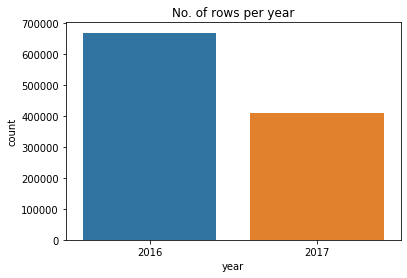

In [56]:
plt.title('No. of rows per year')
sns.countplot(x=train_df['year']);

### Family

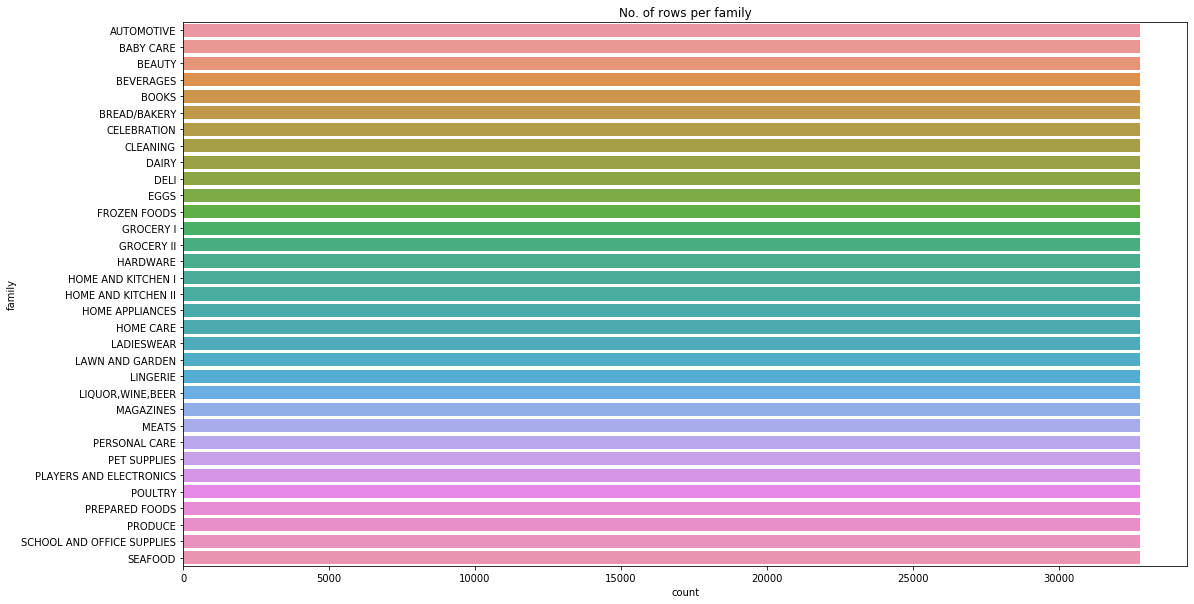

In [57]:
plt.figure(figsize=(18,10))
plt.title('No. of rows per family')
sns.countplot(y=train_df.family);

### Store_nbr

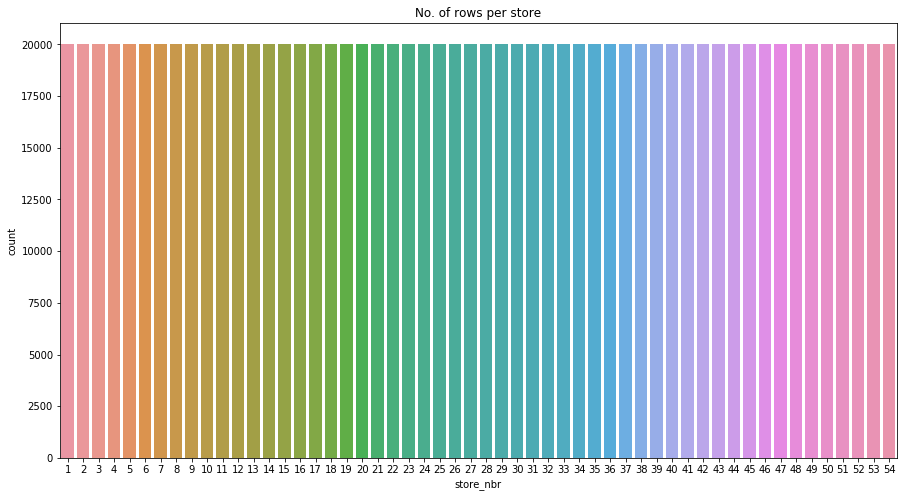

In [58]:
plt.figure(figsize=(15,8))
plt.title('No. of rows per store')
sns.countplot(x=train_df.store_nbr);

### onpromotion

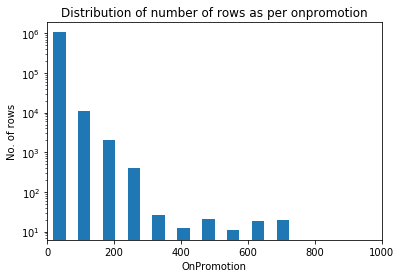

In [59]:
plt.title('Distribution of number of rows as per onpromotion')
plt.xlim(0,1000)
plt.xlabel('OnPromotion')
plt.ylabel('No. of rows')
plt.yscale('log')
plt.hist(x=train_df.onpromotion,rwidth=0.5);

### Sales

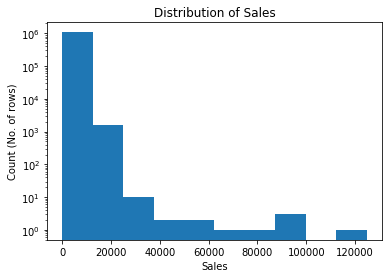

In [60]:
plt.title('Distribution of Sales')
plt.yscale("log")
#plt.xlim(0,30000)
plt.xlabel('Sales')
plt.ylabel('Count (No. of rows)')
plt.hist(x=train_df.sales);

### Distribution of daily Oilprice

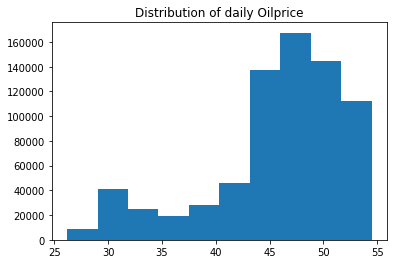

In [61]:
plt.title('Distribution of daily Oilprice')
plt.hist(x=train_df.dcoilwtico);

### Store_nbr vs sales

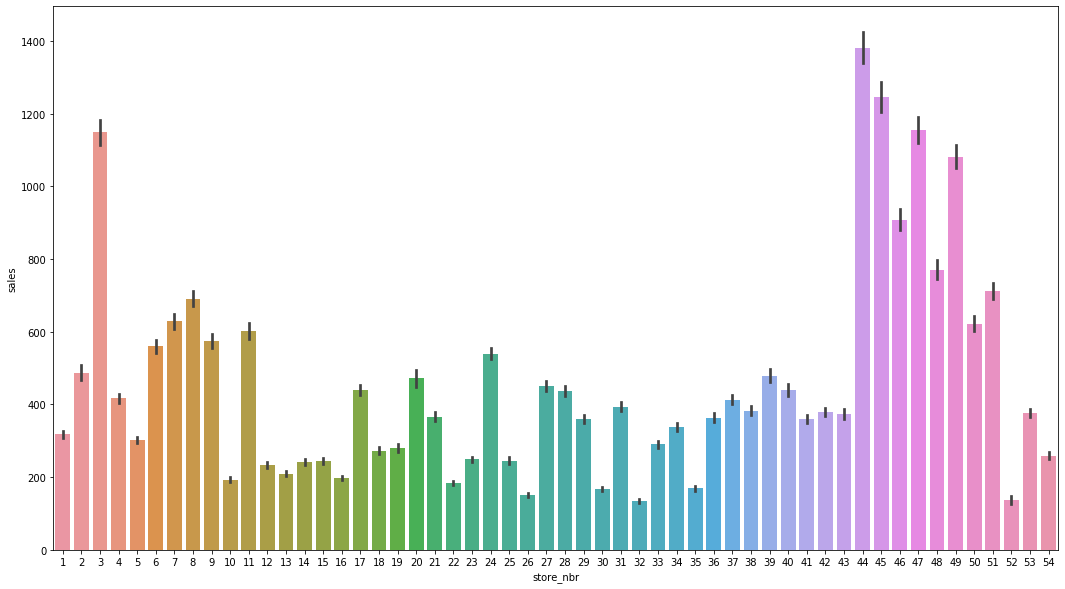

In [62]:
plt.figure(figsize=(18,10))
sns.barplot(x=train_df.store_nbr,y=train_df.sales);

### Family vs sales

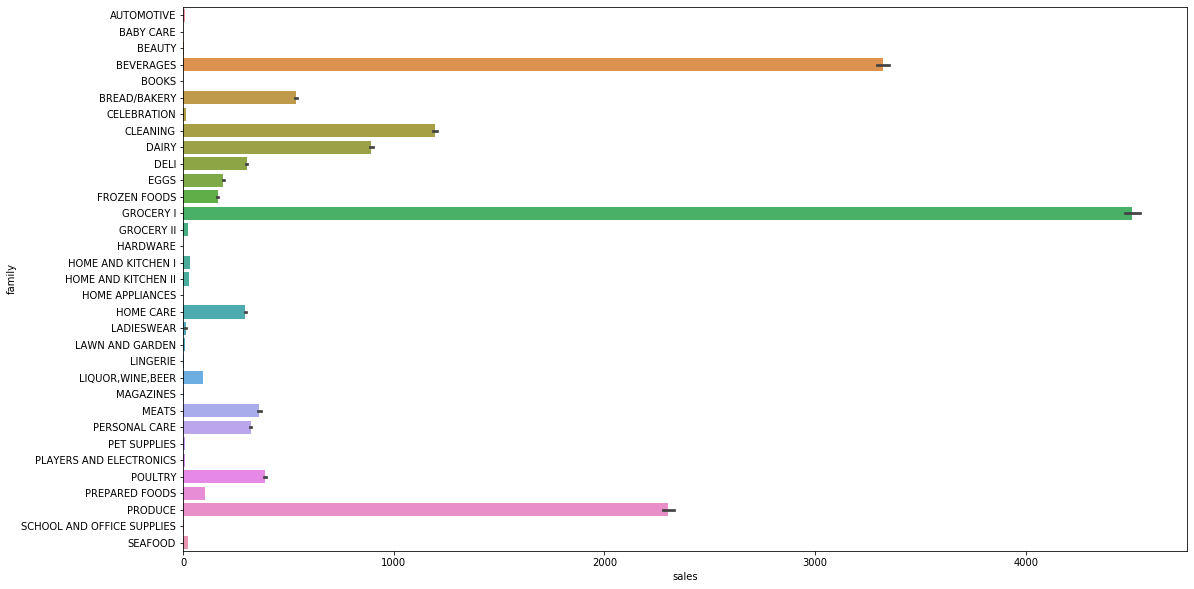

In [63]:
plt.figure(figsize=(18,10))
sns.barplot(y=train_df.family,x=train_df.sales);

### Transactions vs sales

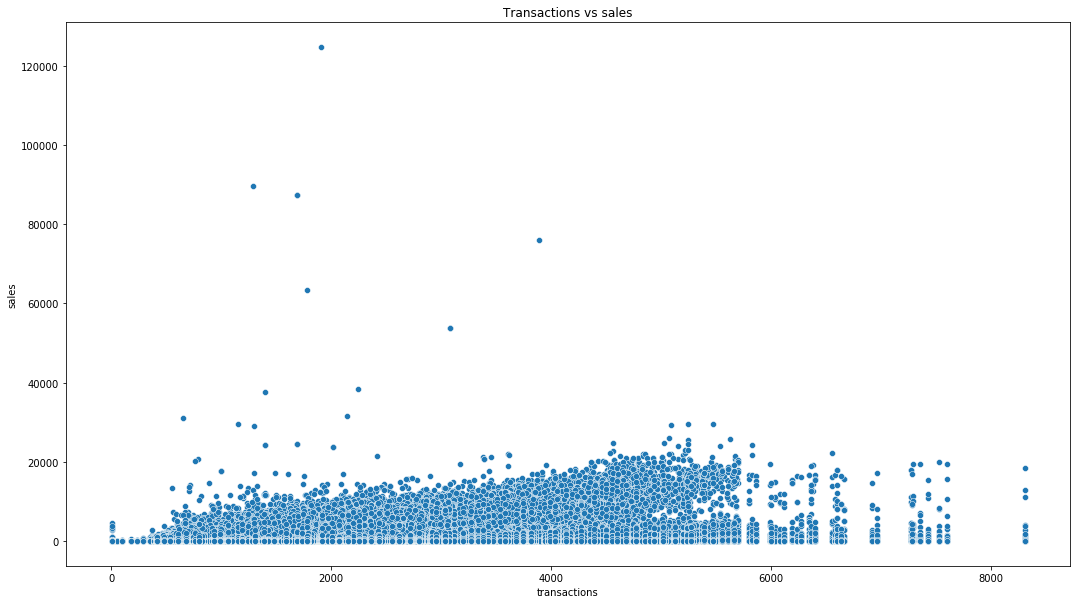

In [64]:
plt.figure(figsize=(18,10))
plt.title('Transactions vs sales')
sns.scatterplot(x=train_df.transactions,y=train_df.sales);

### Monthwise sales

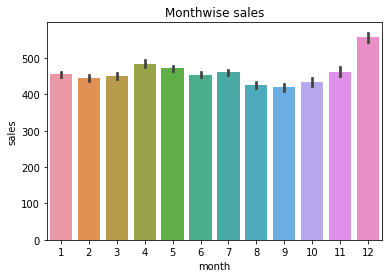

In [65]:
plt.title('Monthwise sales')
sns.barplot(x=train_df.month,y=train_df.sales);

### Daywise sales

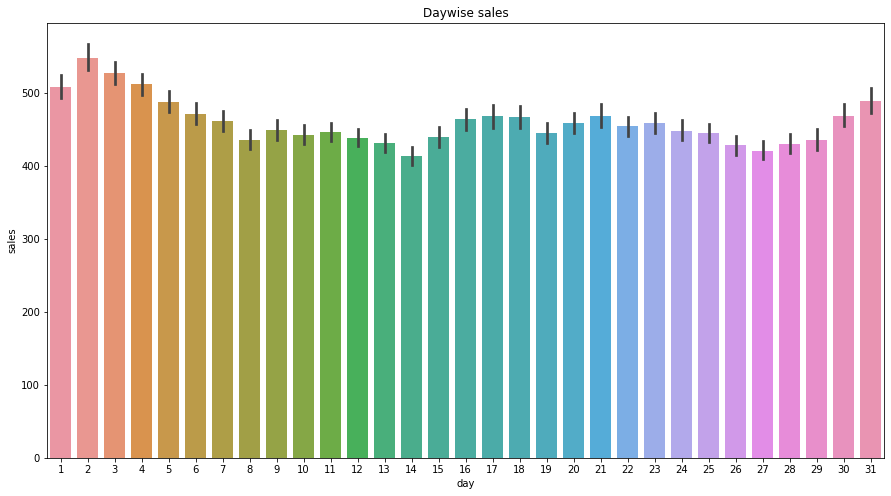

In [66]:
plt.figure(figsize=(15,8))
plt.title('Daywise sales')
sns.barplot(x=train_df.day,y=train_df.sales);

### Clustrer vs sales

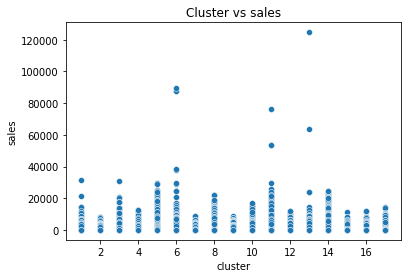

In [67]:
plt.title('Cluster vs sales')
sns.scatterplot(x=train_df.cluster,y=train_df.sales);

### weekday vs sales

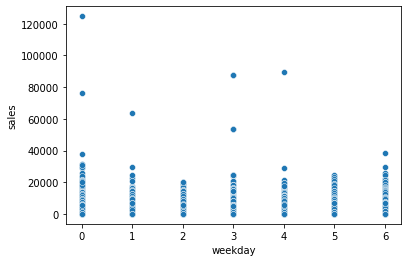

In [68]:
sns.scatterplot(x=train_df.weekday,y=train_df.sales);

### Daily Oilprice vs sales


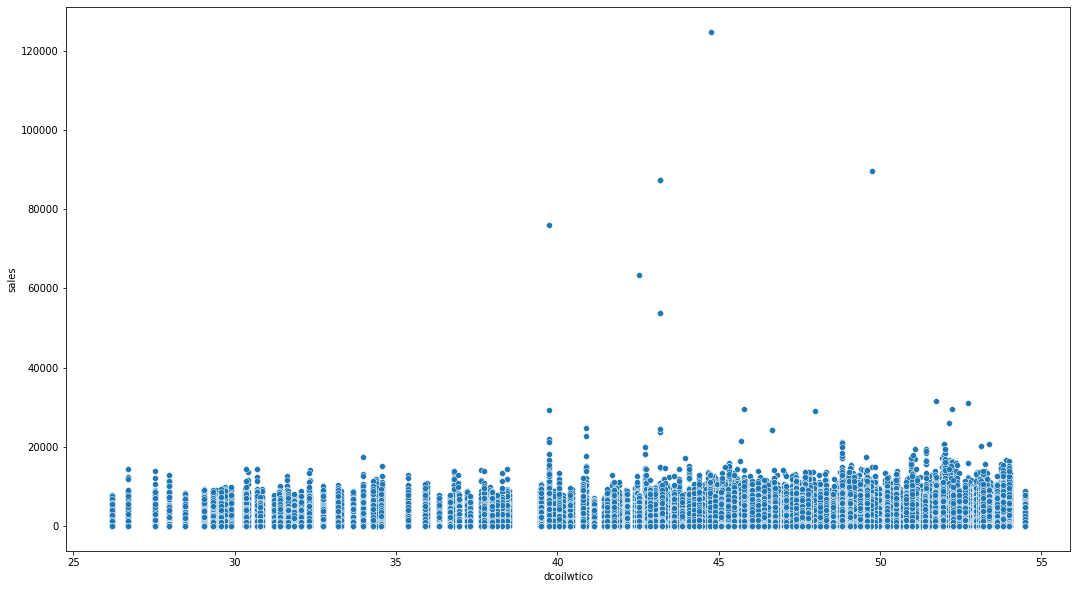

In [69]:
plt.figure(figsize=(18,10))
sns.scatterplot(x=train_df.dcoilwtico,y=train_df.sales);

#### Store type (type_x) vs sales

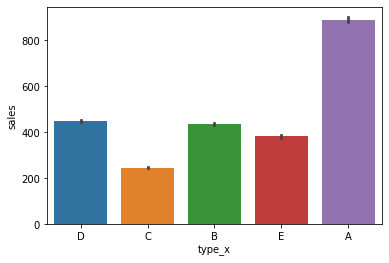

In [70]:
sns.barplot(x=train_df.type_x,y=train_df.sales);

### Citywise sales

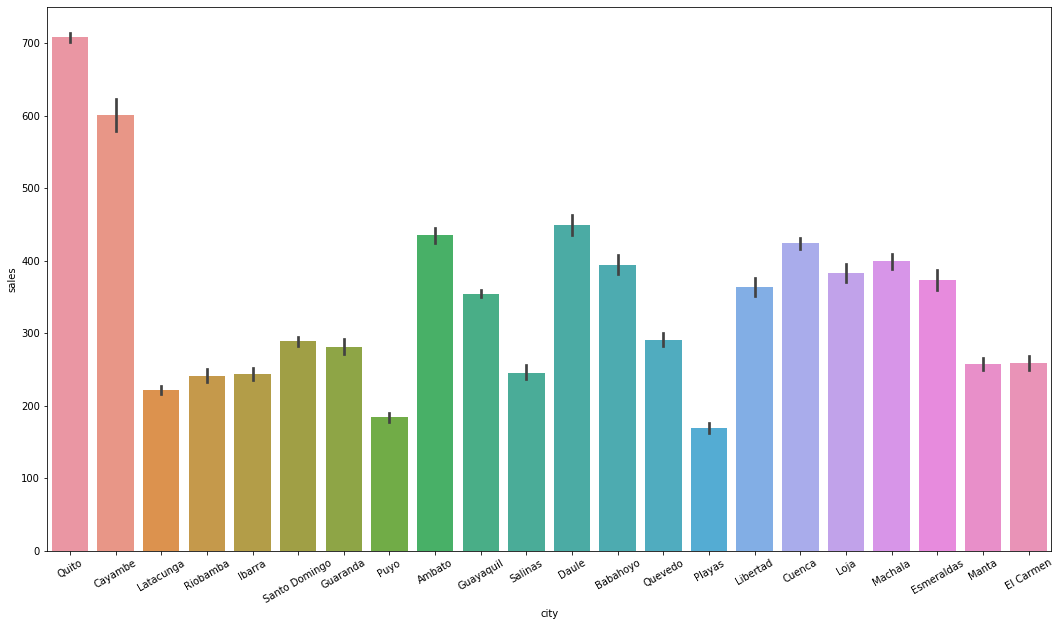

In [71]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30)
sns.barplot(x=train_df.city,y=train_df.sales);

### Statewise sales

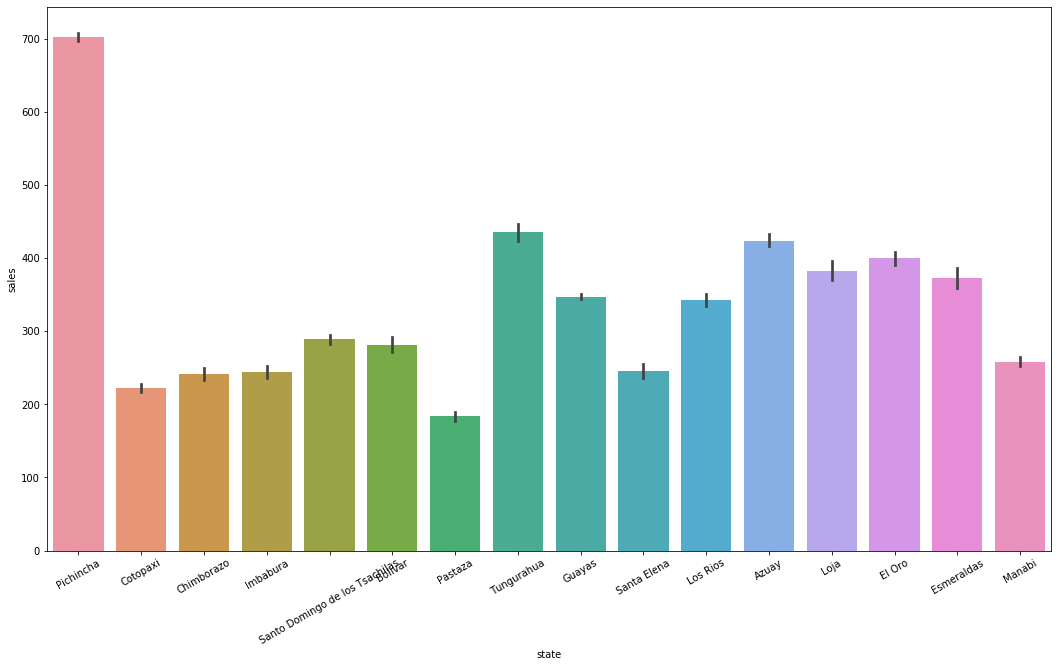

In [72]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30)
sns.barplot(x=train_df.state,y=train_df.sales);

### Correlation between 2 variables

In [73]:
import numpy as np

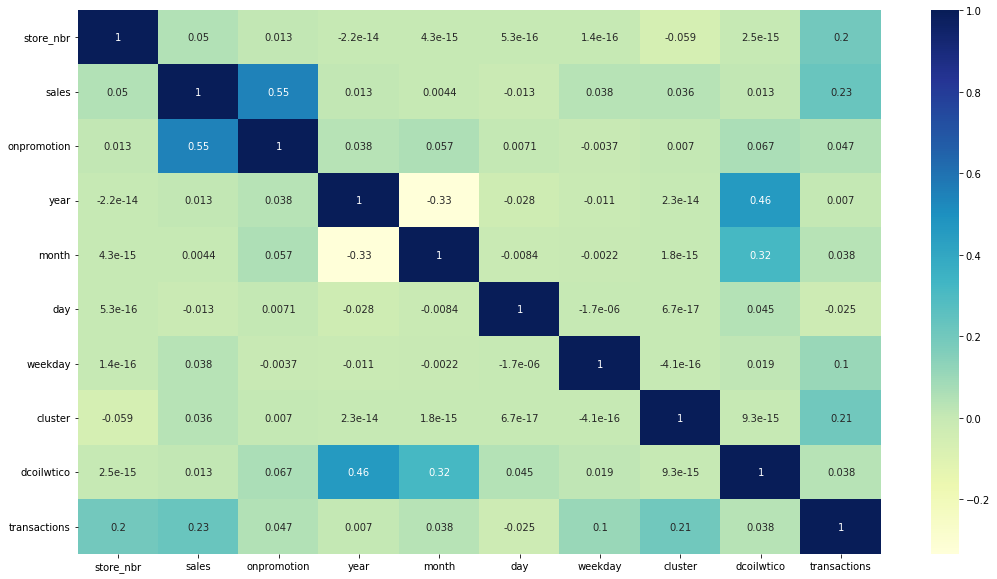

In [74]:
plt.figure(figsize=(18,10))
dataplot = sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)

There is positive correlation in transactions and sales. Therefore, it is good to drop transactions from the train_df as the model can get the idea of sales from transactions feature.

In [75]:
train_df=train_df.drop(['transactions'],axis=1)

In [76]:
test_df=test_df.drop(['transactions'],axis=1)

## Ask & Answer Questions
1. Which month has the highest sales? Which day of the month has highest sales? Which weekday has the highest sales? 

3. Is there any relation between transaction and sales?
4. Which store number has highest sales? Which city, state has highest sales? 

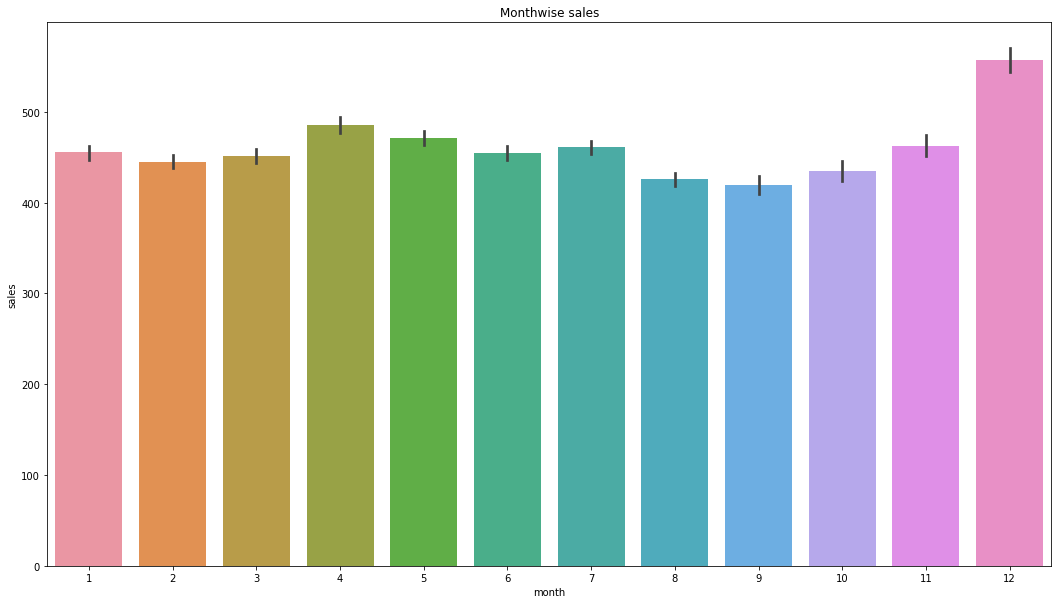

In [77]:
plt.figure(figsize=(18,10))
plt.title('Monthwise sales')
sns.barplot(x=train_df.month,y=train_df.sales);

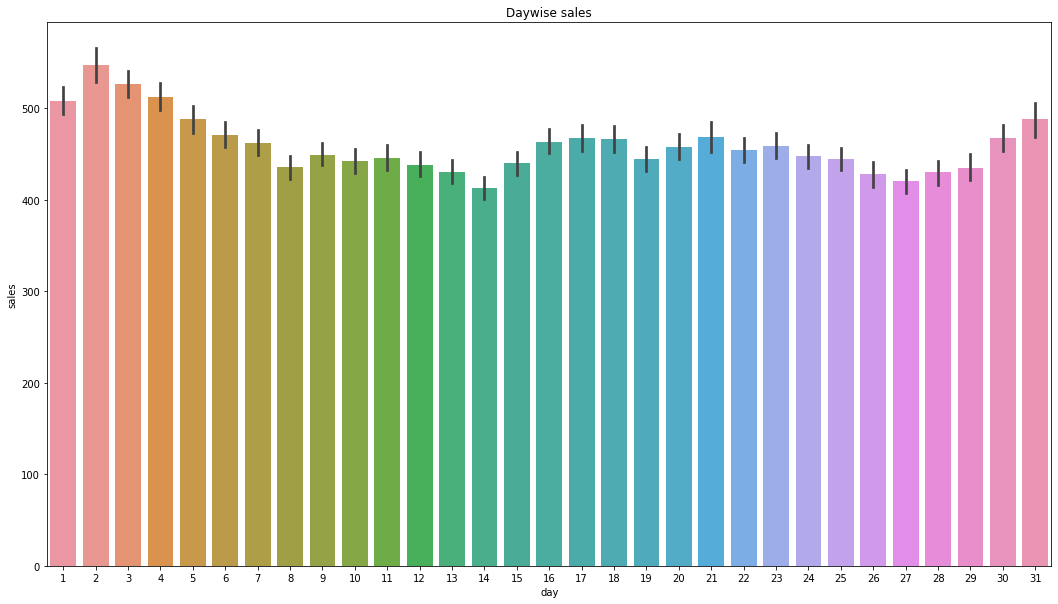

In [78]:
plt.figure(figsize=(18,10))
plt.title('Daywise sales')
sns.barplot(x=train_df.day,y=train_df.sales);

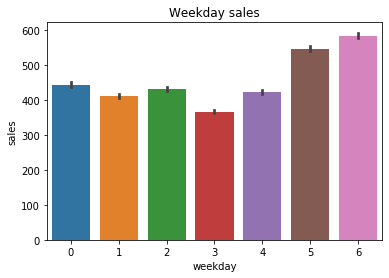

In [79]:
plt.title('Weekday sales')
sns.barplot(x=train_df.weekday,y=train_df.sales);

#### 2. What is the trend of sales according to years? Does the same trend follows for different kinds of products (Family) also?

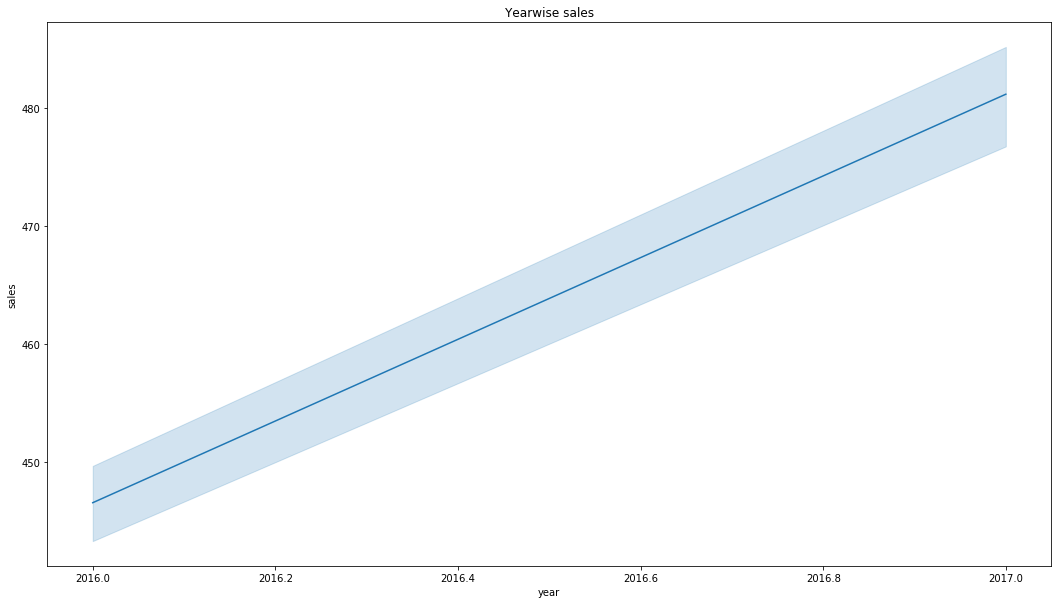

In [80]:
plt.figure(figsize=(18,10))
plt.title('Yearwise sales')
sns.lineplot(x=train_df.year,y=train_df.sales);

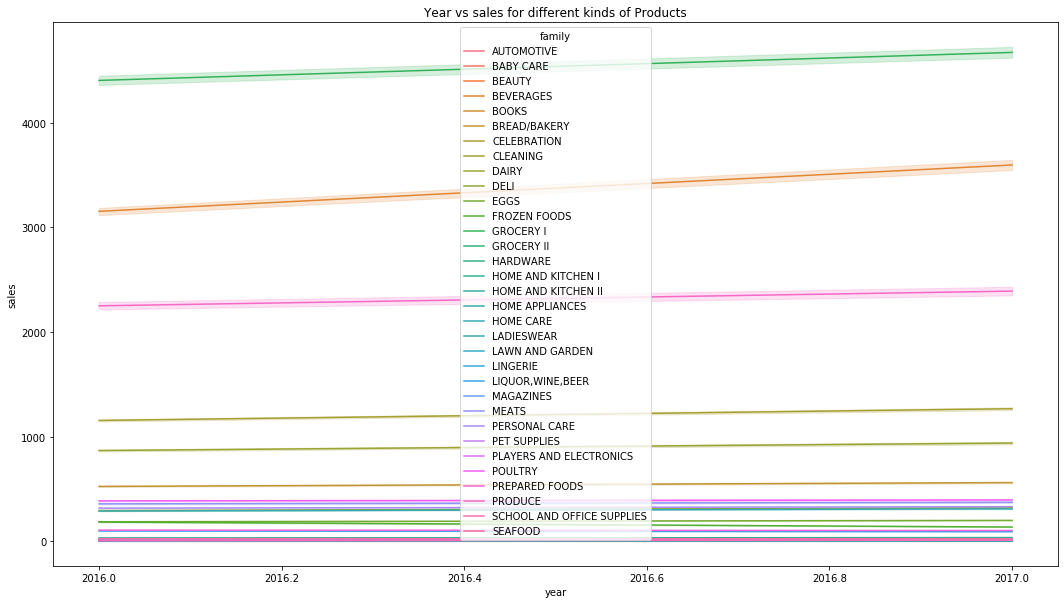

In [81]:
plt.figure(figsize=(18,10))
plt.title('Year vs sales for different kinds of Products')
sns.lineplot(x=train_df.year,y=train_df.sales,hue=train_df.family);

# 3. Prepare the dataset for ML training

Steps:
* Split Training & Validation Set
* Fill/Remove Missing Values
* Extract Inputs & Outputs
 * Training
 * Validation
 * Test

## Spliting Training & Validation Set

We will set aside the data having year 2017 for validation set as this is time-series dataset so we can't just randomly put aside 20% of the dataset for validation.

In [82]:
train_df

,date,store_nbr,family,sales,onpromotion,year,month,day,weekday,city,state,type_x,cluster,dcoilwtico
1972674,2016-01-01,1,AUTOMOTIVE,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
1972675,2016-01-01,1,BABY CARE,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
1972676,2016-01-01,1,BEAUTY,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
1972677,2016-01-01,1,BEVERAGES,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
1972678,2016-01-01,1,BOOKS,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,Quito,Pichincha,B,6,47.57
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,Quito,Pichincha,B,6,47.57
3054345,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,Quito,Pichincha,B,6,47.57
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,Quito,Pichincha,B,6,47.57


In [83]:
train_df[(train_df['year']<2017) & (train_df['year']>=2016)]

,date,store_nbr,family,sales,onpromotion,year,month,day,weekday,city,state,type_x,cluster,dcoilwtico
1972674,2016-01-01,1,AUTOMOTIVE,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
1972675,2016-01-01,1,BABY CARE,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
1972676,2016-01-01,1,BEAUTY,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
1972677,2016-01-01,1,BEVERAGES,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
1972678,2016-01-01,1,BOOKS,0.000,0,2016,1,1,4,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642701,2016-12-31,9,POULTRY,687.853,1,2016,12,31,5,Quito,Pichincha,B,6,NaN
2642702,2016-12-31,9,PREPARED FOODS,100.405,1,2016,12,31,5,Quito,Pichincha,B,6,NaN
2642703,2016-12-31,9,PRODUCE,3091.356,3,2016,12,31,5,Quito,Pichincha,B,6,NaN
2642704,2016-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,2016,12,31,5,Quito,Pichincha,B,6,NaN


In [84]:
train_df,val_df=train_df[(train_df['year']<2017) & (train_df['year']>=2016)],train_df[train_df['year']==2017]

In [85]:
train_df.shape,val_df.shape

((670032, 14), (411642, 14))

## Fill/Remove Missing Values



In [86]:
train_df.isna().sum()*100/len(train_df)

date            0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
year            0.000000
month           0.000000
day             0.000000
weekday         0.000000
city            0.000000
state           0.000000
type_x          0.000000
cluster         0.000000
dcoilwtico     32.180851
dtype: float64

In [87]:
from sklearn.impute import SimpleImputer

In [88]:
imputer=SimpleImputer(strategy='mean')

In [89]:
imputing_col=['dcoilwtico']
imputer.fit(train_df[imputing_col])

SimpleImputer()

In [90]:
train_df[imputing_col]=imputer.transform(train_df[imputing_col])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [91]:
train_df.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
day            0
weekday        0
city           0
state          0
type_x         0
cluster        0
dcoilwtico     0
dtype: int64

In [92]:
imputer.fit(val_df[imputing_col])

SimpleImputer()

In [93]:
val_df[imputing_col]=imputer.transform(val_df[imputing_col])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [94]:
val_df.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
day            0
weekday        0
city           0
state          0
type_x         0
cluster        0
dcoilwtico     0
dtype: int64

In [95]:
imputer.fit(test_df[imputing_col])

SimpleImputer()

In [96]:
test_df[imputing_col]=imputer.transform(test_df[imputing_col])

In [97]:
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
year           0
month          0
day            0
weekday        0
city           0
state          0
type_x         0
cluster        0
dcoilwtico     0
dtype: int64

## Extract Inputs & Outputs

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670032 entries, 1972674 to 2642705
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         670032 non-null  datetime64[ns]
 1   store_nbr    670032 non-null  int64         
 2   family       670032 non-null  object        
 3   sales        670032 non-null  float64       
 4   onpromotion  670032 non-null  int64         
 5   year         670032 non-null  int64         
 6   month        670032 non-null  int64         
 7   day          670032 non-null  int64         
 8   weekday      670032 non-null  int64         
 9   city         670032 non-null  object        
 10  state        670032 non-null  object        
 11  type_x       670032 non-null  object        
 12  cluster      670032 non-null  int64         
 13  dcoilwtico   670032 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(7), object(4)
memory usage: 76.7+ MB


In [99]:
train_df[['store_nbr','year','month','day','weekday','cluster']]=train_df[['store_nbr','year','month','day','weekday','cluster']].astype('object')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [100]:
val_df[['store_nbr','year','month','day','weekday','cluster']]=val_df[['store_nbr','year','month','day','weekday','cluster']].astype('object')

In [101]:
test_df[['store_nbr','year','month','day','weekday','cluster']]=test_df[['store_nbr','year','month','day','weekday','cluster']].astype('object')

In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670032 entries, 1972674 to 2642705
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         670032 non-null  datetime64[ns]
 1   store_nbr    670032 non-null  object        
 2   family       670032 non-null  object        
 3   sales        670032 non-null  float64       
 4   onpromotion  670032 non-null  int64         
 5   year         670032 non-null  object        
 6   month        670032 non-null  object        
 7   day          670032 non-null  object        
 8   weekday      670032 non-null  object        
 9   city         670032 non-null  object        
 10  state        670032 non-null  object        
 11  type_x       670032 non-null  object        
 12  cluster      670032 non-null  object        
 13  dcoilwtico   670032 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 76.7+ MB

In [103]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411642 entries, 2642706 to 3054347
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         411642 non-null  datetime64[ns]
 1   store_nbr    411642 non-null  object        
 2   family       411642 non-null  object        
 3   sales        411642 non-null  float64       
 4   onpromotion  411642 non-null  int64         
 5   year         411642 non-null  object        
 6   month        411642 non-null  object        
 7   day          411642 non-null  object        
 8   weekday      411642 non-null  object        
 9   city         411642 non-null  object        
 10  state        411642 non-null  object        
 11  type_x       411642 non-null  object        
 12  cluster      411642 non-null  object        
 13  dcoilwtico   411642 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 47.1+ MB

In [104]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  object        
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   year         28512 non-null  object        
 6   month        28512 non-null  object        
 7   day          28512 non-null  object        
 8   weekday      28512 non-null  object        
 9   city         28512 non-null  object        
 10  state        28512 non-null  object        
 11  type_x       28512 non-null  object        
 12  cluster      28512 non-null  object        
 13  dcoilwtico   28512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 3.3+ MB


In [105]:
train_df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'day', 'weekday', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico'],
      dtype='object')

In [106]:
input_cols=['store_nbr', 'family', 'onpromotion', 'year','weekday', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico']

In [107]:
target_col= 'sales'

## Training 

In [108]:
train_inputs=train_df[input_cols]

In [109]:
train_targets=train_df[target_col]

In [110]:
train_inputs

,store_nbr,family,onpromotion,year,weekday,city,state,type_x,cluster,dcoilwtico
1972674,1,AUTOMOTIVE,0,2016,4,Quito,Pichincha,D,13,43.340392
1972675,1,BABY CARE,0,2016,4,Quito,Pichincha,D,13,43.340392
1972676,1,BEAUTY,0,2016,4,Quito,Pichincha,D,13,43.340392
1972677,1,BEVERAGES,0,2016,4,Quito,Pichincha,D,13,43.340392
1972678,1,BOOKS,0,2016,4,Quito,Pichincha,D,13,43.340392
...,...,...,...,...,...,...,...,...,...,...
2642701,9,POULTRY,1,2016,5,Quito,Pichincha,B,6,43.340392
2642702,9,PREPARED FOODS,1,2016,5,Quito,Pichincha,B,6,43.340392
2642703,9,PRODUCE,3,2016,5,Quito,Pichincha,B,6,43.340392
2642704,9,SCHOOL AND OFFICE SUPPLIES,0,2016,5,Quito,Pichincha,B,6,43.340392


In [111]:
train_targets

1972674       0.000
1972675       0.000
1972676       0.000
1972677       0.000
1972678       0.000
             ...   
2642701     687.853
2642702     100.405
2642703    3091.356
2642704       2.000
2642705      13.000
Name: sales, Length: 670032, dtype: float64

## Validation

In [112]:
val_inputs=val_df[input_cols]

In [113]:
val_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411642 entries, 2642706 to 3054347
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   store_nbr    411642 non-null  object 
 1   family       411642 non-null  object 
 2   onpromotion  411642 non-null  int64  
 3   year         411642 non-null  object 
 4   weekday      411642 non-null  object 
 5   city         411642 non-null  object 
 6   state        411642 non-null  object 
 7   type_x       411642 non-null  object 
 8   cluster      411642 non-null  object 
 9   dcoilwtico   411642 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 34.5+ MB


In [114]:
val_targets=val_df[target_col]

In [115]:
val_inputs

,store_nbr,family,onpromotion,year,weekday,city,state,type_x,cluster,dcoilwtico
2642706,1,AUTOMOTIVE,0,2017,6,Quito,Pichincha,D,13,49.386903
2642707,1,BABY CARE,0,2017,6,Quito,Pichincha,D,13,49.386903
2642708,1,BEAUTY,0,2017,6,Quito,Pichincha,D,13,49.386903
2642709,1,BEVERAGES,0,2017,6,Quito,Pichincha,D,13,49.386903
2642710,1,BOOKS,0,2017,6,Quito,Pichincha,D,13,49.386903
...,...,...,...,...,...,...,...,...,...,...
3054343,9,POULTRY,0,2017,1,Quito,Pichincha,B,6,47.570000
3054344,9,PREPARED FOODS,1,2017,1,Quito,Pichincha,B,6,47.570000
3054345,9,PRODUCE,148,2017,1,Quito,Pichincha,B,6,47.570000
3054346,9,SCHOOL AND OFFICE SUPPLIES,8,2017,1,Quito,Pichincha,B,6,47.570000


In [116]:
val_targets

2642706       0.000
2642707       0.000
2642708       0.000
2642709       0.000
2642710       0.000
             ...   
3054343     438.133
3054344     154.553
3054345    2419.729
3054346     121.000
3054347      16.000
Name: sales, Length: 411642, dtype: float64

## Test

In [117]:
test_inputs=test_df[input_cols]

In [118]:
test_inputs

,store_nbr,family,onpromotion,year,weekday,city,state,type_x,cluster,dcoilwtico
0,1,AUTOMOTIVE,0,2017,2,Quito,Pichincha,D,13,46.80
1,1,BABY CARE,0,2017,2,Quito,Pichincha,D,13,46.80
2,1,BEAUTY,2,2017,2,Quito,Pichincha,D,13,46.80
3,1,BEVERAGES,20,2017,2,Quito,Pichincha,D,13,46.80
4,1,BOOKS,0,2017,2,Quito,Pichincha,D,13,46.80
...,...,...,...,...,...,...,...,...,...,...
28507,9,POULTRY,1,2017,3,Quito,Pichincha,B,6,47.26
28508,9,PREPARED FOODS,0,2017,3,Quito,Pichincha,B,6,47.26
28509,9,PRODUCE,1,2017,3,Quito,Pichincha,B,6,47.26
28510,9,SCHOOL AND OFFICE SUPPLIES,9,2017,3,Quito,Pichincha,B,6,47.26


### Preprocessing 

In [119]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
train_inputs.columns

Index(['store_nbr', 'family', 'onpromotion', 'year', 'weekday', 'city',
       'state', 'type_x', 'cluster', 'dcoilwtico'],
      dtype='object')

In [121]:
categorical_cols=['store_nbr','family','year','weekday','city','state','type_x','cluster']
numerical_cols=['onpromotion','dcoilwtico']

In [122]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [123]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [124]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


155

In [125]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [126]:
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [127]:
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [128]:
X_train=train_inputs[numerical_cols+encoded_cols]
X_val=val_inputs[numerical_cols+encoded_cols]
X_test=test_inputs[numerical_cols+encoded_cols]

# Train Hardcoded & Baseline Models

* Hardcoded model: Always predict average sales
* Baseline model: Decision Tree Regression

For evaluation the dataset uses Root Mean Squared Logarithmic Error (RMSLE): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predict the average.

In [129]:
import numpy as np

In [130]:
class MeanRegressor:
  def fit(self,inputs,targets):
    self.mean=targets.mean()

  def predict(self,inputs):
    return np.full(inputs.shape[0],self.mean)


In [131]:
mean_model=MeanRegressor()

In [132]:
mean_model.fit(X_train,train_targets)

In [133]:
train_preds=mean_model.predict(X_train)

In [134]:
train_preds

array([446.51891668, 446.51891668, 446.51891668, ..., 446.51891668,
       446.51891668, 446.51891668])

In [135]:
val_preds=mean_model.predict(X_val)

In [136]:
val_preds

array([446.51891668, 446.51891668, 446.51891668, ..., 446.51891668,
       446.51891668, 446.51891668])

In [137]:
from sklearn.metrics import mean_squared_log_error

In [138]:
def rmsle(targets,preds):
  return mean_squared_log_error(targets,preds,squared=False)

In [139]:
train_targets

1972674       0.000
1972675       0.000
1972676       0.000
1972677       0.000
1972678       0.000
             ...   
2642701     687.853
2642702     100.405
2642703    3091.356
2642704       2.000
2642705      13.000
Name: sales, Length: 670032, dtype: float64

In [140]:
train_rmsle=rmsle(train_targets,train_preds)

In [141]:
train_rmsle

3.7330586444512197

In [142]:
val_rmsle=rmsle(val_targets,val_preds)

In [143]:
val_rmsle

3.5893245425628577

Our dump hard-coded model is off by \$3.589 on average, which is pretty good considering the average sale is \$446.518. 

## Train & Evaluate Baseline Model

We'll train decision tree regression model as our baseline model.

The linear regression model is off by $3.23, which isn't much better than simply predicting the averages.

This is mainly because the training data is not in a format that's useful for the model, and we're not using informations like Family, store location, year, month and other useful information.

However, now we have a baseline model that our other models should ideally beat.

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
tree=DecisionTreeRegressor(random_state=42)

In [146]:
tree.fit(X_train,train_targets)

DecisionTreeRegressor(random_state=42)

In [147]:
tree_train_preds=tree.predict(X_train)

In [148]:
rmsle(train_targets,tree_train_preds)

0.33898871624719074

In [149]:
tree_val_preds=tree.predict(X_val)

In [150]:
rmsle(val_targets,tree_val_preds)

0.8306401336402122

Training Error is 0.3389 and Validation error is 0.8306 which is better than predicting average sales.

In [151]:
#tree2=DecisionTreeRegressor(random_state=42,max_depth=40)

In [152]:
#tree2.fit(X_train,train_targets)

In [153]:
#tree2_train_preds=tree2.predict(X_train)

In [154]:
#rmsle(train_targets,tree2_train_preds)

In [155]:
#tree2_val_preds=tree2.predict(X_val)

In [156]:
#rmsle(val_targets,tree2_val_preds)

Error is 0.7927 which is not much better than the previous result.

#### RandomForest Regressor

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
# Create the model
rf1 = RandomForestRegressor(n_jobs=-1,random_state=42)

In [159]:
rf1.fit(X_train,train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [160]:
rf1_train_predicts=rf1.predict(X_train)

In [161]:
rf1_train_rmsle=rmsle(train_targets,rf1_train_predicts)

In [162]:
rf1_train_rmsle

0.42027144216119044

In [163]:
rf1_val_predicts=rf1.predict(X_val)

In [164]:
rf1_val_rmsle=rmsle(val_targets,rf1_val_predicts)

In [165]:
rf1_val_rmsle

0.7184357475103692

### XG Boost

In [166]:
from xgboost import XGBRegressor

In [178]:
model=XGBRegressor(n_jobs=-1,random_state=42,n_estimators=40,max_depth=6)

In [ ]:
%%time
model.fit(X_train,train_targets)

[06:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [169]:
xgboost_train_preds=model.predict(X_train)

In [170]:
rmsle(xgboost_train_preds,train_targets)

2.4065378532006636

In [171]:
xgboost_val_preds=model.predict(X_val)

In [172]:
rmsle(xgboost_val_preds,val_targets)

2.284605319902554

## 5. Make Predictions and Submit to Kaggle

* Make predictions for test set
* Generate submission csv
* Submit to Kaggle
* Record in experiment tracking sheet

In [173]:
test_inputs

,store_nbr,family,onpromotion,year,weekday,city,state,type_x,cluster,dcoilwtico,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,1,AUTOMOTIVE,0,2017,2,Quito,Pichincha,D,13,46.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,BABY CARE,0,2017,2,Quito,Pichincha,D,13,46.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,BEAUTY,2,2017,2,Quito,Pichincha,D,13,46.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,BEVERAGES,20,2017,2,Quito,Pichincha,D,13,46.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,BOOKS,0,2017,2,Quito,Pichincha,D,13,46.80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,9,POULTRY,1,2017,3,Quito,Pichincha,B,6,47.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28508,9,PREPARED FOODS,0,2017,3,Quito,Pichincha,B,6,47.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28509,9,PRODUCE,1,2017,3,Quito,Pichincha,B,6,47.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28510,9,SCHOOL AND OFFICE SUPPLIES,9,2017,3,Quito,Pichincha,B,6,47.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
def predict_and_submit(model,test_inputs,fname):
  test_preds=model.predict(test_inputs)
  sub_df=pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['sales']=test_preds
  sub_df.to_csv(fname,index=None)
  return sub_df

In [175]:
predict_and_submit(tree,X_test,'decision_tree_submission.csv')

,id,sales
0,3000888,4.000
1,3000889,0.000
2,3000890,10.000
3,3000891,2347.000
4,3000892,0.000
...,...,...
28507,3029395,324.384
28508,3029396,94.456
28509,3029397,1179.889
28510,3029398,22.000


In [176]:
predict_and_submit(rf1,X_test,'random_forest_submission.csv')

,id,sales
0,3000888,3.270000
1,3000889,0.000000
2,3000890,6.900000
3,3000891,2225.260000
4,3000892,0.150000
...,...,...
28507,3029395,327.362219
28508,3029396,77.926330
28509,3029397,1125.808970
28510,3029398,63.650000


In [177]:
predict_and_submit(model,X_test,'xg_boost_submission.csv')

,id,sales
0,3000888,66.033112
1,3000889,66.033112
2,3000890,145.943115
3,3000891,2562.733154
4,3000892,66.033112
...,...,...
28507,3029395,111.252274
28508,3029396,66.033112
28509,3029397,1993.774292
28510,3029398,276.456177
